<a href="https://colab.research.google.com/github/ldselvera/huggingface/blob/main/02-Diffusers/VideoDiffuser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-b0e71d0c-a173-1ddc-83d6-88d92acd352b)


In [ ]:
# !pip3 install torch torchvision torchaudio diffusers transformers accelerate
# !pip install transformers
# !pip install accelerate

In [ ]:
import torch, diffusers, transformers
print(torch.__version__)
print(diffusers.__version__)
print(transformers.__version__)

2.3.0+cu121
0.29.2
4.41.2


In [ ]:
from diffusers import StableVideoDiffusionPipeline

In [ ]:
# pipe = StableVideoDiffusionPipeline.from_pretrained("stabilityai/stable-video-diffusion-img2vid-xt")
pipe = StableVideoDiffusionPipeline.from_pretrained("stabilityai/stable-video-diffusion-img2vid-xt",
                                                    torch_dtype=torch.float16,
                                                    variant="fp16")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/196M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/3.05G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
pipe.enable_model_cpu_offload()

In [ ]:
from diffusers.utils import load_image, export_to_video

In [ ]:
# https://unsplash.com/photos/sheep-on-grass-field-sfB_Nw9sggw
image=load_image("/content/photo-1528709024086-98a7672e0b9d.png")

In [ ]:
image.size

(878, 555)

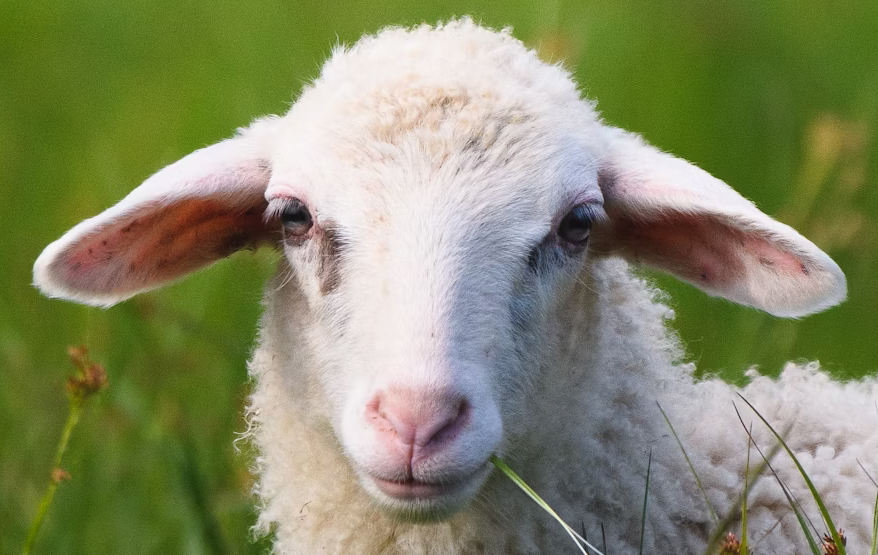

In [ ]:
image

In [ ]:
generator = torch.manual_seed(42)

In [ ]:
frames = pipe(image, decode_chunk_size=8, generator=generator).frames[0]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
type(frames)

list

In [ ]:
type(frames[0])

PIL.Image.Image

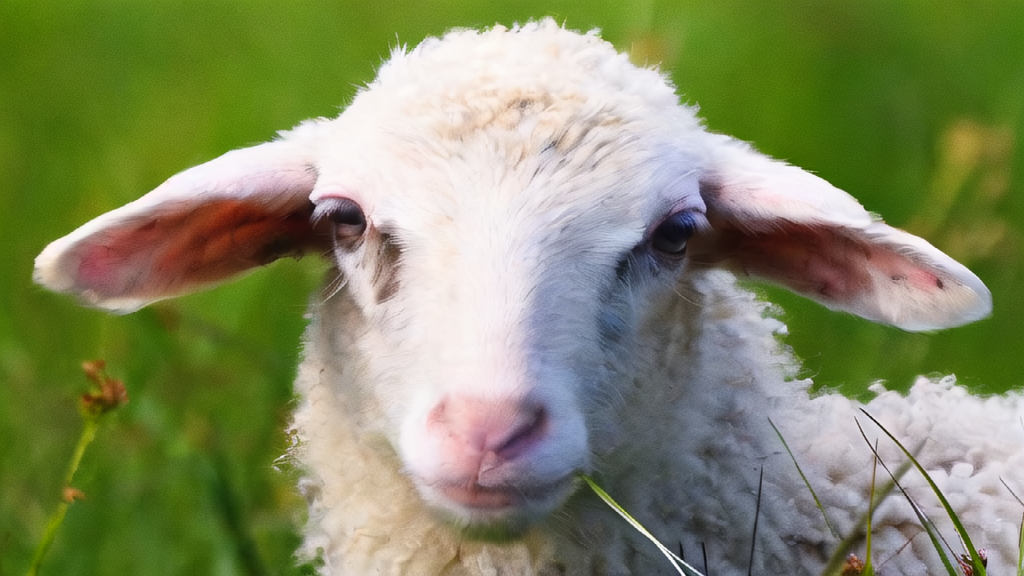

In [ ]:
frames[0]

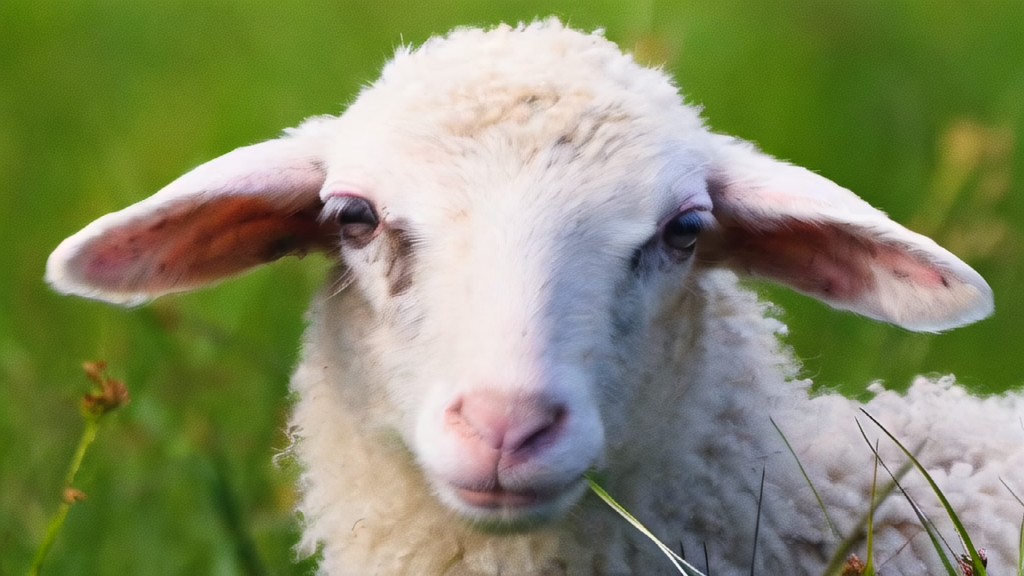

In [ ]:
frames[1]

In [ ]:
export_to_video(frames, "/content/generated_video.mp4", fps=7)

'/content/generated_video.mp4'

## Image2VideoGen-XL

In [ ]:
# Remove previous model
# cd ~
# cd .cache
# cd huggingface/hub
# ls
# rm -r models--stabilityai--stable-video-diffusion-img2vid-xt/

In [ ]:
# !nvidia-smi

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
import diffusers
from diffusers.utils import load_image, export_to_video
from diffusers import I2VGenXLPipeline

In [ ]:
repo_id = "ali-vilab/i2vgen-xl"

In [ ]:
pipeline = I2VGenXLPipeline.from_pretrained(repo_id, torch_dtype=torch.float16, variant="fp16")
pipeline.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/555 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/507 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/563 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/706M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/637 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.84G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
image = load_image("/content/photo-1528709024086-98a7672e0b9d.png")

In [ ]:
prompt = "goat eating grass"

In [ ]:
generator = torch.manual_seed(42)

In [ ]:
frames = pipeline(prompt=prompt, image=image, generator=generator).frames[0]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


In [ ]:
export_to_video(frames, "/content/generated_improved_video.mp4", fps=8)

'/content/generated_improved_video.mp4'